# Data preprocessing

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
from joblib import dump

In [23]:
df = pd.read_csv('../data/SavedData.csv')
print(df.columns)

Index(['town', 'flat_type', 'flat_model', 'floor_area_sqm', 'street_name',
       'resale_price', 'month', 'remaining_lease', 'lease_commence_date',
       'storey_range', '_id', 'block'],
      dtype='object')


In [24]:
df.head()

,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,remaining_lease,lease_commence_date,storey_range,_id,block
0,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 1,285000.0,2017-01,58 years 04 months,1976,04 TO 06,8,218
1,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 1,297000.0,2017-01,59 years 06 months,1977,07 TO 09,14,219
2,ANG MO KIO,3 ROOM,New Generation,68.0,ANG MO KIO AVE 1,330000.0,2017-01,63 years,1981,07 TO 09,27,333
3,ANG MO KIO,3 ROOM,New Generation,68.0,ANG MO KIO AVE 1,338000.0,2017-01,63 years,1981,07 TO 09,29,330
4,ANG MO KIO,4 ROOM,New Generation,97.0,ANG MO KIO AVE 1,460000.0,2017-01,58 years 06 months,1976,04 TO 06,43,207


In [25]:
df.isna().sum()

town                   0
flat_type              0
flat_model             0
floor_area_sqm         0
street_name            0
resale_price           0
month                  0
remaining_lease        0
lease_commence_date    0
storey_range           0
_id                    0
block                  0
dtype: int64

In [26]:
df.drop(['_id'], axis=1, inplace=True)

C:\Users\Codvent's PC\AppData\Local\Temp\ipykernel_9976\1392532110.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.resale_price)


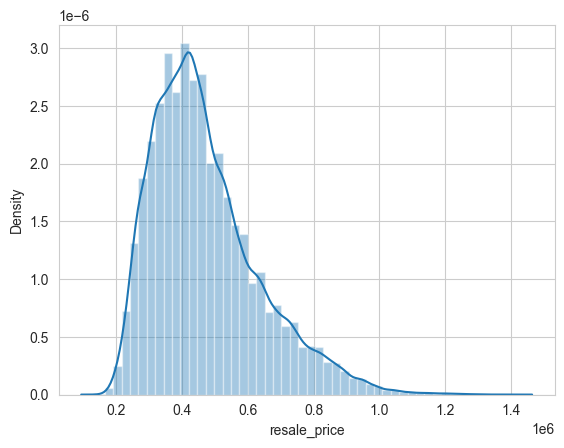

In [27]:
sns.set_style('whitegrid')
sns.distplot(df.resale_price)
plt.show()


C:\Users\Codvent's PC\AppData\Local\Temp\ipykernel_9976\1608431336.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

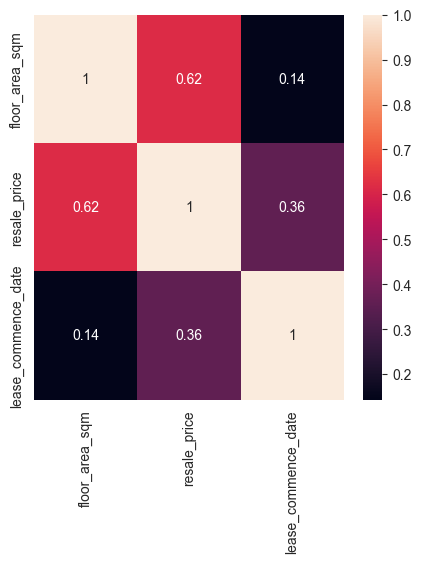

In [28]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True)

In [29]:
# drop streetname, lease, block -- not using these features
df.drop(['street_name', 'remaining_lease', 'block'], axis=1, inplace=True)

In [30]:
# check for any typos in values
print("Total of {0} towns with values {1}\n".format(df.town.nunique(), df.town.unique()))
print("Total of {0} types of flats with values {1}\n".format(df.flat_type.nunique(),df.flat_type.unique()))
print("Total of {0} models of flats with values {1}\n".format(df.flat_model.nunique(),df.flat_model.unique()))
print(df.storey_range.unique())

Total of 26 towns with values ['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'PASIR RIS' 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG' 'SERANGOON'
 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']

Total of 7 types of flats with values ['3 ROOM' '4 ROOM' '5 ROOM' '2 ROOM' 'EXECUTIVE' '1 ROOM'
 'MULTI-GENERATION']

Total of 21 models of flats with values ['New Generation' 'Improved' 'Standard' 'Apartment' 'DBSS' 'Model A'
 'Simplified' 'Model A-Maisonette' 'Premium Apartment' 'Maisonette'
 'Adjoined flat' 'Type S1' 'Type S2' 'Model A2' 'Terrace'
 'Improved-Maisonette' 'Premium Maisonette' 'Multi Generation'
 'Premium Apartment Loft' '2-room' '3Gen']

['04 TO 06' '07 TO 09' '10 TO 12' '01 TO 03' '13 TO 15' '19 TO 21'
 '22 TO 24' '16 TO 18' '34 TO 36' '28 TO 30' '37 TO 39' '49 TO 51'
 '25 TO 27' '40 TO 42' '31 TO 33' '46 TO 48

In [31]:
# town, flat type, flat model, storey range: one-hot encoding (previously label)
# month: label encoding. 2017-02 is encoded as 0

In [32]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
ohe = preprocessing.OneHotEncoder()

town_ohe = pd.get_dummies(df['town'], prefix='Town')

df_train = pd.concat([df, town_ohe], axis=1 )
df_train

,town,flat_type,flat_model,floor_area_sqm,resale_price,month,lease_commence_date,storey_range,Town_ANG MO KIO,Town_BEDOK,...,Town_PASIR RIS,Town_PUNGGOL,Town_QUEENSTOWN,Town_SEMBAWANG,Town_SENGKANG,Town_SERANGOON,Town_TAMPINES,Town_TOA PAYOH,Town_WOODLANDS,Town_YISHUN
0,ANG MO KIO,3 ROOM,New Generation,67.0,285000.0,2017-01,1976,04 TO 06,1,0,...,0,0,0,0,0,0,0,0,0,0
1,ANG MO KIO,3 ROOM,New Generation,67.0,297000.0,2017-01,1977,07 TO 09,1,0,...,0,0,0,0,0,0,0,0,0,0
2,ANG MO KIO,3 ROOM,New Generation,68.0,330000.0,2017-01,1981,07 TO 09,1,0,...,0,0,0,0,0,0,0,0,0,0
3,ANG MO KIO,3 ROOM,New Generation,68.0,338000.0,2017-01,1981,07 TO 09,1,0,...,0,0,0,0,0,0,0,0,0,0
4,ANG MO KIO,4 ROOM,New Generation,97.0,460000.0,2017-01,1976,04 TO 06,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133864,YISHUN,4 ROOM,Model A,103.0,511800.0,2022-08,1988,04 TO 06,0,0,...,0,0,0,0,0,0,0,0,0,1
133865,YISHUN,4 ROOM,Model A,103.0,550888.0,2022-08,1988,10 TO 12,0,0,...,0,0,0,0,0,0,0,0,0,1
133866,YISHUN,4 ROOM,Model A,108.0,520000.0,2022-08,1987,01 TO 03,0,0,...,0,0,0,0,0,0,0,0,0,1
133867,YISHUN,5 ROOM,Improved,122.0,575000.0,2022-08,1987,01 TO 03,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
flat_model_ohe = pd.get_dummies(df['flat_model'], prefix='Model')

df_train = pd.concat([df_train, flat_model_ohe], axis=1 )
df_train

,town,flat_type,flat_model,floor_area_sqm,resale_price,month,lease_commence_date,storey_range,Town_ANG MO KIO,Town_BEDOK,...,Model_Multi Generation,Model_New Generation,Model_Premium Apartment,Model_Premium Apartment Loft,Model_Premium Maisonette,Model_Simplified,Model_Standard,Model_Terrace,Model_Type S1,Model_Type S2
0,ANG MO KIO,3 ROOM,New Generation,67.0,285000.0,2017-01,1976,04 TO 06,1,0,...,0,1,0,0,0,0,0,0,0,0
1,ANG MO KIO,3 ROOM,New Generation,67.0,297000.0,2017-01,1977,07 TO 09,1,0,...,0,1,0,0,0,0,0,0,0,0
2,ANG MO KIO,3 ROOM,New Generation,68.0,330000.0,2017-01,1981,07 TO 09,1,0,...,0,1,0,0,0,0,0,0,0,0
3,ANG MO KIO,3 ROOM,New Generation,68.0,338000.0,2017-01,1981,07 TO 09,1,0,...,0,1,0,0,0,0,0,0,0,0
4,ANG MO KIO,4 ROOM,New Generation,97.0,460000.0,2017-01,1976,04 TO 06,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133864,YISHUN,4 ROOM,Model A,103.0,511800.0,2022-08,1988,04 TO 06,0,0,...,0,0,0,0,0,0,0,0,0,0
133865,YISHUN,4 ROOM,Model A,103.0,550888.0,2022-08,1988,10 TO 12,0,0,...,0,0,0,0,0,0,0,0,0,0
133866,YISHUN,4 ROOM,Model A,108.0,520000.0,2022-08,1987,01 TO 03,0,0,...,0,0,0,0,0,0,0,0,0,0
133867,YISHUN,5 ROOM,Improved,122.0,575000.0,2022-08,1987,01 TO 03,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
flat_type_ohe = pd.get_dummies(df['flat_type'], prefix='Type')

df_train = pd.concat([df_train, flat_type_ohe], axis=1 )
df_train

,town,flat_type,flat_model,floor_area_sqm,resale_price,month,lease_commence_date,storey_range,Town_ANG MO KIO,Town_BEDOK,...,Model_Terrace,Model_Type S1,Model_Type S2,Type_1 ROOM,Type_2 ROOM,Type_3 ROOM,Type_4 ROOM,Type_5 ROOM,Type_EXECUTIVE,Type_MULTI-GENERATION
0,ANG MO KIO,3 ROOM,New Generation,67.0,285000.0,2017-01,1976,04 TO 06,1,0,...,0,0,0,0,0,1,0,0,0,0
1,ANG MO KIO,3 ROOM,New Generation,67.0,297000.0,2017-01,1977,07 TO 09,1,0,...,0,0,0,0,0,1,0,0,0,0
2,ANG MO KIO,3 ROOM,New Generation,68.0,330000.0,2017-01,1981,07 TO 09,1,0,...,0,0,0,0,0,1,0,0,0,0
3,ANG MO KIO,3 ROOM,New Generation,68.0,338000.0,2017-01,1981,07 TO 09,1,0,...,0,0,0,0,0,1,0,0,0,0
4,ANG MO KIO,4 ROOM,New Generation,97.0,460000.0,2017-01,1976,04 TO 06,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133864,YISHUN,4 ROOM,Model A,103.0,511800.0,2022-08,1988,04 TO 06,0,0,...,0,0,0,0,0,0,1,0,0,0
133865,YISHUN,4 ROOM,Model A,103.0,550888.0,2022-08,1988,10 TO 12,0,0,...,0,0,0,0,0,0,1,0,0,0
133866,YISHUN,4 ROOM,Model A,108.0,520000.0,2022-08,1987,01 TO 03,0,0,...,0,0,0,0,0,0,1,0,0,0
133867,YISHUN,5 ROOM,Improved,122.0,575000.0,2022-08,1987,01 TO 03,0,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
storey_range_ohe = pd.get_dummies(df['storey_range'], prefix='Storey')

df_train = pd.concat([df_train, storey_range_ohe], axis=1 )
df_train

,town,flat_type,flat_model,floor_area_sqm,resale_price,month,lease_commence_date,storey_range,Town_ANG MO KIO,Town_BEDOK,...,Storey_22 TO 24,Storey_25 TO 27,Storey_28 TO 30,Storey_31 TO 33,Storey_34 TO 36,Storey_37 TO 39,Storey_40 TO 42,Storey_43 TO 45,Storey_46 TO 48,Storey_49 TO 51
0,ANG MO KIO,3 ROOM,New Generation,67.0,285000.0,2017-01,1976,04 TO 06,1,0,...,0,0,0,0,0,0,0,0,0,0
1,ANG MO KIO,3 ROOM,New Generation,67.0,297000.0,2017-01,1977,07 TO 09,1,0,...,0,0,0,0,0,0,0,0,0,0
2,ANG MO KIO,3 ROOM,New Generation,68.0,330000.0,2017-01,1981,07 TO 09,1,0,...,0,0,0,0,0,0,0,0,0,0
3,ANG MO KIO,3 ROOM,New Generation,68.0,338000.0,2017-01,1981,07 TO 09,1,0,...,0,0,0,0,0,0,0,0,0,0
4,ANG MO KIO,4 ROOM,New Generation,97.0,460000.0,2017-01,1976,04 TO 06,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133864,YISHUN,4 ROOM,Model A,103.0,511800.0,2022-08,1988,04 TO 06,0,0,...,0,0,0,0,0,0,0,0,0,0
133865,YISHUN,4 ROOM,Model A,103.0,550888.0,2022-08,1988,10 TO 12,0,0,...,0,0,0,0,0,0,0,0,0,0
133866,YISHUN,4 ROOM,Model A,108.0,520000.0,2022-08,1987,01 TO 03,0,0,...,0,0,0,0,0,0,0,0,0,0
133867,YISHUN,5 ROOM,Improved,122.0,575000.0,2022-08,1987,01 TO 03,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
le = preprocessing.LabelEncoder()
df_train['month_encoded'] = le.fit_transform(df['month'])
dump(le, filename="month_encoder.pkl")

mapping = dict(zip(le.classes_, range(0, len(le.classes_))))
print(mapping)

{'2017-01': 0, '2017-02': 1, '2017-03': 2, '2017-04': 3, '2017-05': 4, '2017-06': 5, '2017-07': 6, '2017-08': 7, '2017-09': 8, '2017-10': 9, '2017-11': 10, '2017-12': 11, '2018-01': 12, '2018-02': 13, '2018-03': 14, '2018-04': 15, '2018-05': 16, '2018-06': 17, '2018-07': 18, '2018-08': 19, '2018-09': 20, '2018-10': 21, '2018-11': 22, '2018-12': 23, '2019-01': 24, '2019-02': 25, '2019-03': 26, '2019-04': 27, '2019-05': 28, '2019-06': 29, '2019-07': 30, '2019-08': 31, '2019-09': 32, '2019-10': 33, '2019-11': 34, '2019-12': 35, '2020-01': 36, '2020-02': 37, '2020-03': 38, '2020-04': 39, '2020-05': 40, '2020-06': 41, '2020-07': 42, '2020-08': 43, '2020-09': 44, '2020-10': 45, '2020-11': 46, '2020-12': 47, '2021-01': 48, '2021-02': 49, '2021-03': 50, '2021-04': 51, '2021-05': 52, '2021-06': 53, '2021-07': 54, '2021-08': 55, '2021-09': 56, '2021-10': 57, '2021-11': 58, '2021-12': 59, '2022-01': 60, '2022-02': 61, '2022-03': 62, '2022-04': 63, '2022-05': 64, '2022-06': 65, '2022-07': 66, '202

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [38]:
y = df.resale_price
X = df_train.drop(['flat_type', 'storey_range', 'flat_model', 'month', 'town', 'resale_price'], axis=1)

# Polynomial regression

In [39]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.30, random_state=42)

In [40]:
poly_reg = LinearRegression()
poly_reg.fit(X_train, y_train)

LinearRegression()

In [41]:
poly_preds = poly_reg.predict(X_test)
rmse = mean_squared_error(y_test, poly_preds) ** 0.5
acc = r2_score(y_test, poly_preds)
print("RMSE: ", rmse)
print("R2: ", acc)


RMSE:  42816.09501052419
R2:  0.9312320601925739


In [42]:
from joblib import dump

# dump the pipeline model
dump(poly_reg, filename="model.pkl")




['model.pkl']